# 1. IMPORTS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# 2. LOGISTIC REGRESSION MODEL

In [2]:
# create dataset
X, y = make_classification(n_samples=187, n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [3]:
# define the model
lr = LogisticRegression(random_state=2)

# fit
lr.fit(X_train, y_train)

# predictions
yhat_pred = lr.predict(X_test)
yhat_proba = lr.predict_proba(X_test)[:, 1]

# performance
f1_pred = metrics.f1_score(y_test, yhat_pred)
print(f'f1 score before choosing the best threshold: {f1_pred}')

f1 score before choosing the best threshold: 0.85


In [4]:
# roc and auc curve
fpr, tpr, th = metrics.roc_curve(y_test, yhat_proba)
auc = metrics.roc_auc_score(y_test, yhat_proba)

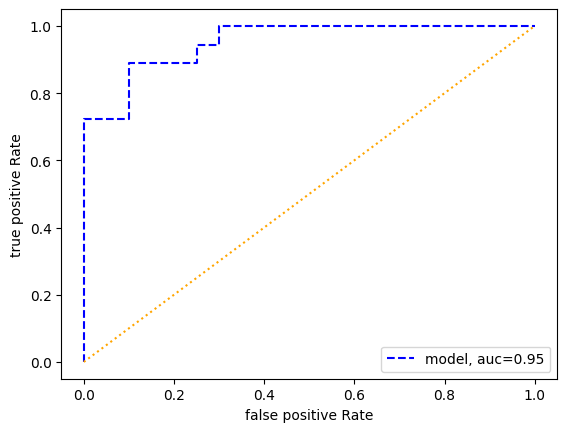

In [5]:
# plot the curve
plt.plot(fpr, tpr, color='b', linestyle='dashed', label='model, auc=%0.2f' %auc)
plt.plot([0, 1], [0, 1], color='orange', linestyle='dotted')
plt.xlabel('false positive Rate')
plt.ylabel('true positive Rate')
plt.legend()
plt.show()

In [6]:
# find the best threshold
distances = np.sqrt(((1-tpr)**2) + (fpr**2))
best_th = th[np.argmin(distances)]

In [7]:
# classify with new threshold
yhat_test = [1 if i >= best_th else 0 for i in list(yhat_proba)]

# performance
f1_proba = metrics.f1_score(y_test, yhat_test)
print(f'f1 score after choosing the best threshold: {f1_proba}')

f1 score after choosing the best threshold: 0.8888888888888888


# 3. DECISION BOUNDARIES

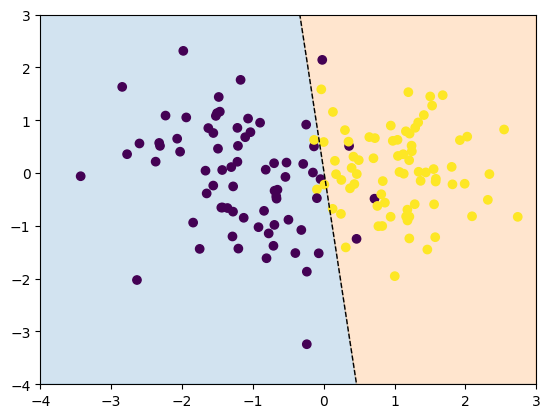

In [8]:
# retrieve model parameters
intercepto = lr.intercept_[0]
coef1, coef2 = lr.coef_.T

# calculate the intercept and gradient of the decision boundary.
c = -intercepto/coef2
m = -coef1/coef2

# plot the data and classification withh the decision boundary
xmin, xmax = -4, 3
ymin, ymax = -4, 3
xd = np.array([xmin, xmax])
yd = m*xd + c

plt.plot(xd, yd, 'k', lw=1,ls='dashed')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)
plt.scatter(X_train[:, 0], X_train[:,1], c=y_train)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()

# 3. DECISION BOUNDARIES WITH PROBABILITY

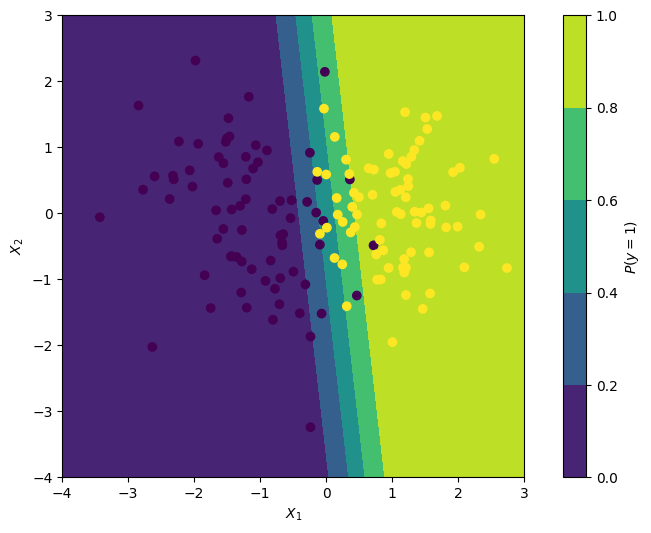

In [39]:
# draw a grid
xx, yy = np.mgrid[-4:3:.01, -4:3:.01]
grid = np.c_[xx.ravel(), yy.ravel()]

# calculate probabilities
probs = lr.predict_proba(grid)[:, 1].reshape(xx.shape)

# draw contours
f, ax = plt.subplots(figsize=(10, 6))
countour = ax.contourf(xx, yy, probs, 5, vmin=0, vmax=1)

# probability bar
ax_c = f.colorbar(countour)
ax_c.set_label('$P(y=1)$')
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
ax.set(aspect='equal', xlim=(-4, 3), ylim=(-4, 3), xlabel='$X_1$', ylabel='$X_2$')
plt.show()